In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme()
sns.set_context('talk')

In [2]:
childcare = pd.read_csv("data/abortion-childcare.csv")
childcare = childcare.drop(columns =["Unnamed: 0"])
paid_leave = pd.read_csv("data/abortion-paid-leave.csv")
paid_leave = paid_leave.drop(columns=['Unnamed: 0'])
abortion = childcare.merge(paid_leave, how='inner', left_on='State', right_on='State')
abortion = abortion.drop(columns=['Abortion Overview_y'])
abortion = abortion.rename(columns={'Abortion Overview_x':'Abortion Overview'})
abortion["Infant Care %"] = 0
for i in range(len(abortion["Cost of Infant Care as Percent of Women's Median Annual Earningsa,b"])):
    perc = abortion["Cost of Infant Care as Percent of Women's Median Annual Earningsa,b"][i]
    num = perc[0:len(perc)-1]
    abortion["Infant Care %"][i] = float(num)
abortion = abortion.drop(columns=["Cost of Infant Care as Percent of Women's Median Annual Earningsa,b"])

<ipython-input-2-4963edbebffd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abortion["Infant Care %"][i] = float(num)


In [3]:
abortion.head()

,State,Abortion Overview,Child Care Total Score,Paid Leave Legislation Total Score,Infant Care %
0,Alabama,significantly restricted,1.42,0.0,16
1,Alaska,neither,1.37,0.0,23
2,Arizona,significantly restricted,0.97,0.0,25
3,Arkansas,significantly restricted,1.54,0.0,19
4,California,protected,0.95,2.0,27


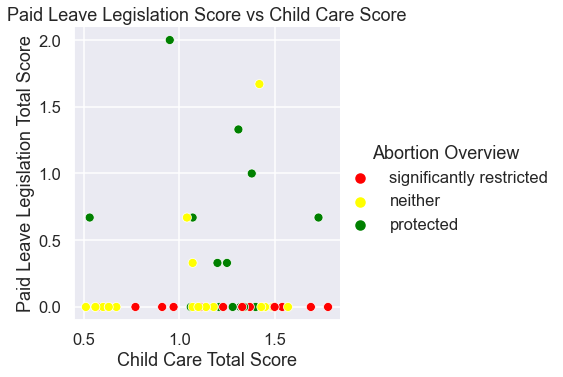

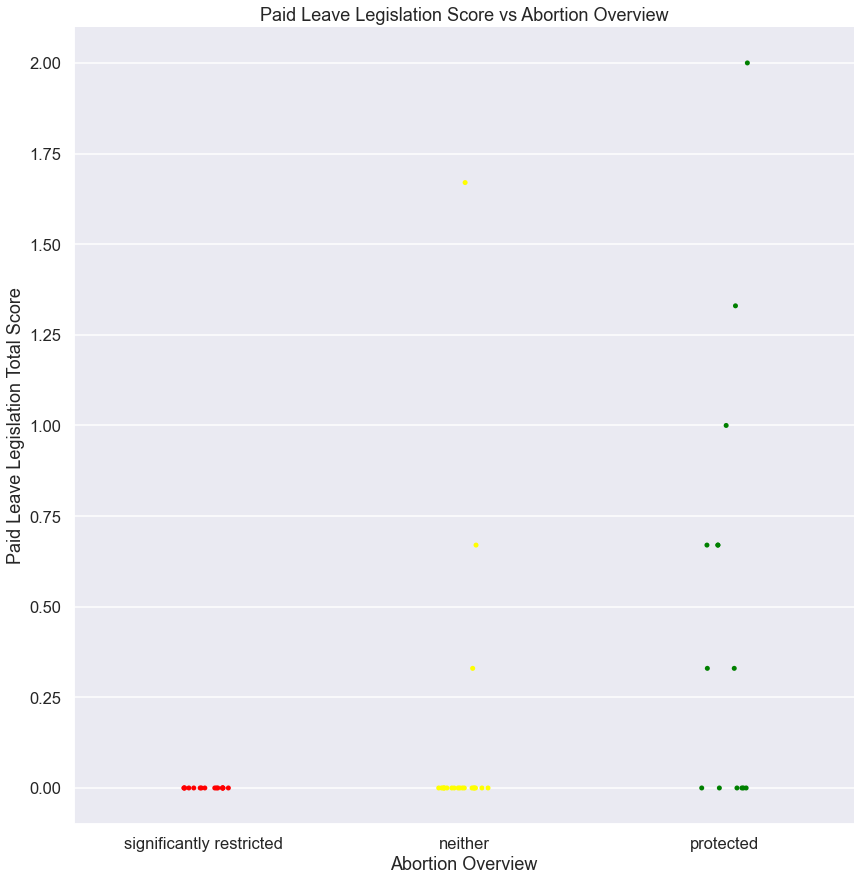

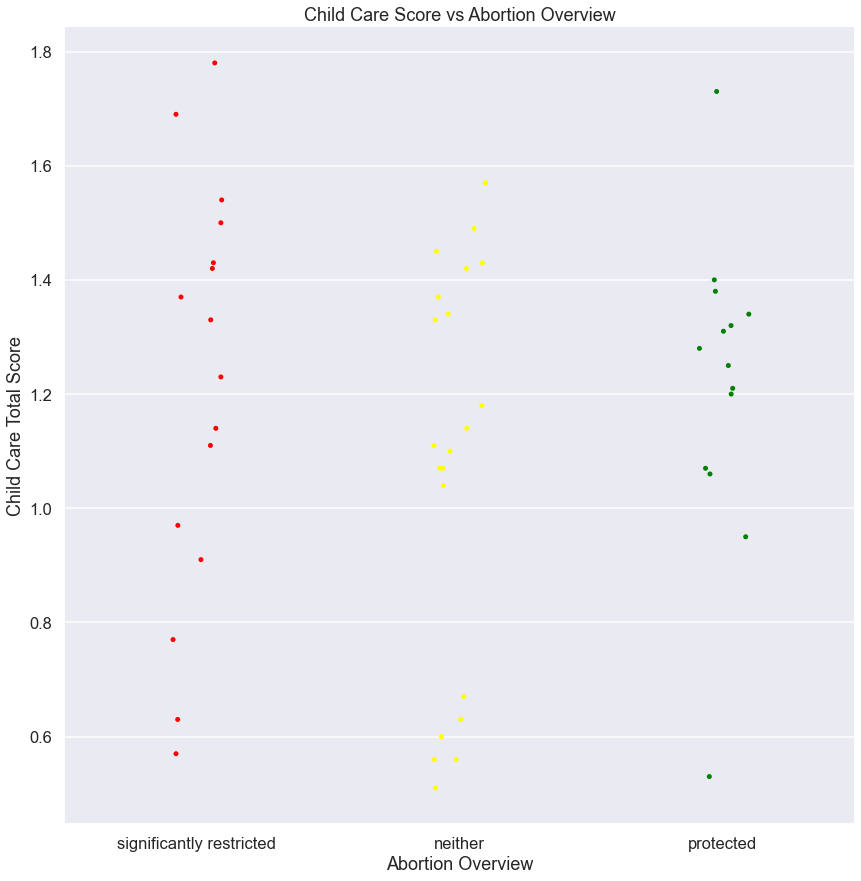

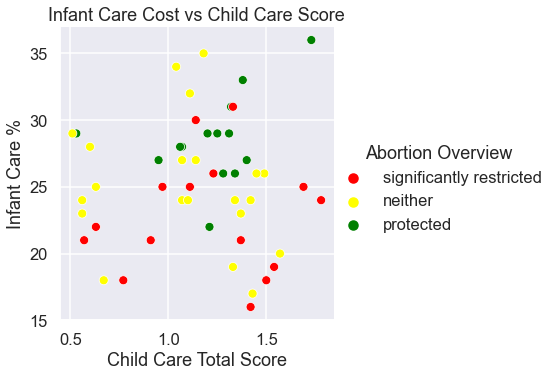

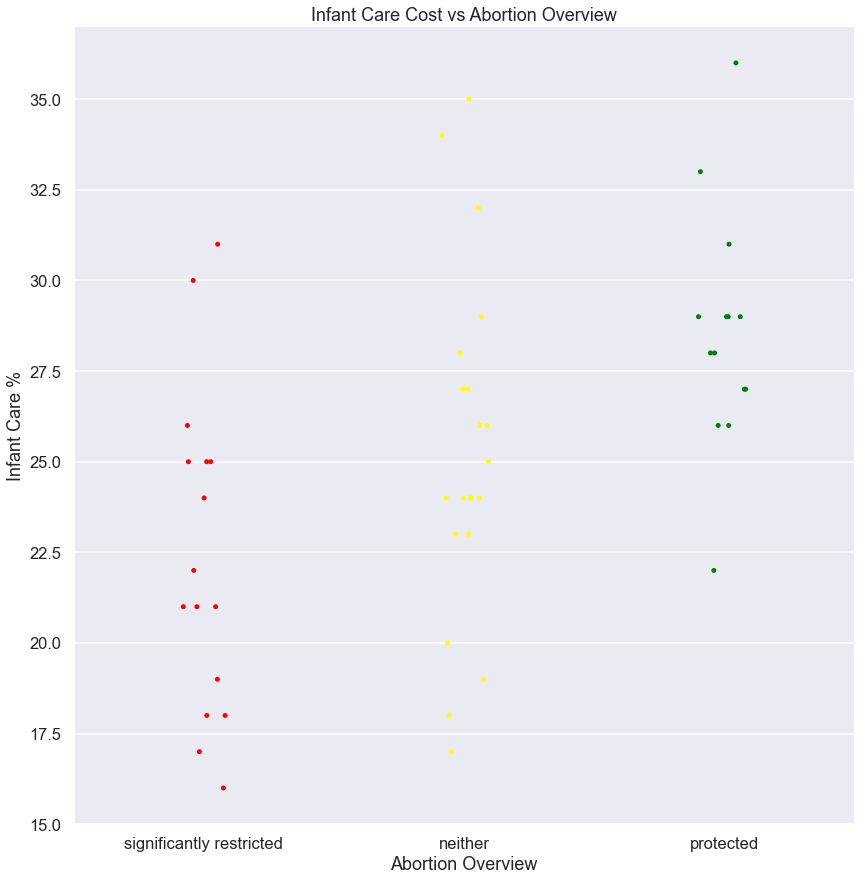

In [4]:
paidleave_vs_childcare = sns.relplot(data=abortion, x = "Child Care Total Score", 
                                     y = "Paid Leave Legislation Total Score", hue = "Abortion Overview", 
                                     palette=["red", "yellow", "green"]).set(
                                     title = "Paid Leave Legislation Score vs Child Care Score")
paidleave_vs_abortion = sns.catplot(data=abortion, x = "Abortion Overview", palette=["red", "yellow", "green"],
                                    y = "Paid Leave Legislation Total Score", height=12).set(
                                    title = "Paid Leave Legislation Score vs Abortion Overview")

childcare_vs_abortion = sns.catplot(data=abortion, x = "Abortion Overview", height=12,
                                    y = "Child Care Total Score", palette=["red", "yellow", "green"]).set(
                                    title = "Child Care Score vs Abortion Overview")

careperc_vs_childcare = sns.relplot(data=abortion, x = "Child Care Total Score", 
                                    y = "Infant Care %", hue = "Abortion Overview", 
                                    palette=["red", "yellow", "green"]).set(title = 
                                    "Infant Care Cost vs Child Care Score")
careperc_vs_abortion = sns.catplot(data=abortion, x = "Abortion Overview", y = "Infant Care %", 
                                   palette=["red", "yellow", "green"], height=12).set(
                                    title = "Infant Care Cost vs Abortion Overview")

In [5]:
# Insurance Stuff - 2018

In [6]:
def fix_data_types(df):
    df = df.infer_objects()
    df = df.astype({"statefips": str, "countyfips": str})
    df["countyfips"] = df["countyfips"].apply(lambda x: x.zfill(3))
    df["GEOID20"] = df["statefips"] + df["countyfips"]
    return df

In [7]:
def fix_sahie(df):
    df = fix_data_types(df)
    df = df.drop(columns=["statefips", "version", "year", "countyfips", "county_name", "Unnamed: 25", "GEOID20",
                         "nui_moe", "pctui_moe", "pctic_moe", "pctelig_moe", "pctliic_moe", "nipr_moe", "nic_moe"])
    df = df[df['racecat'] != '0']
    df = df[df['sexcat'] != '0']
    df = df[df['iprcat'] != '0']
    df = df[df['iprcat'] != '5']
    df['race'] = '0'
    df.loc[(df['racecat']=='1'),'race']='White'
    df.loc[(df['racecat']=='2'),'race']='Black'
    df.loc[(df['racecat']=='3'),'race']='Hispanic'
    df['sex'] = '0'
    df.loc[(df['sexcat']=='1'),'sex']='Male'
    df.loc[(df['sexcat']=='2'),'sex']='Female'
    df['ipr'] = '0'
    df.loc[(df['iprcat']=='1'),'ipr']='<200% poverty'
    df.loc[(df['iprcat']=='2'),'ipr']='<250% poverty'
    df.loc[(df['iprcat']=='3'),'ipr']='<138% poverty'
    df.loc[(df['iprcat']=='4'),'ipr']='<400% poverty'
    

    df['NUI'] = df['NUI'].astype(int)
    df['NIPR'] = df['NIPR'].astype(int)
    df['NIC'] = df['NIC'].astype(int)
    df["NIC:NUI"] = df["NIC"]/df["NUI"]
    df = df.reset_index()
    df['state_name'] = df['state_name'].str.strip()
    return df

In [8]:
sahie_2018 = pd.read_csv("data/sahie_2018.csv", header=68, dtype=str)
sahie_2018 = fix_sahie(sahie_2018)
sahie_2018

,index,geocat,agecat,racecat,sexcat,iprcat,NIPR,NUI,NIC,PCTUI,PCTIC,PCTELIG,PCTLIIC,state_name,race,sex,ipr,NIC:NUI
0,25,40,0,1,1,1,326951,73594,253357,22.5,77.5,5.9,20.2,Alabama,White,Male,<200% poverty,3.442631
1,26,40,0,1,1,2,432794,89238,343556,20.6,79.4,7.1,27.4,Alabama,White,Male,<250% poverty,3.849885
2,27,40,0,1,1,3,200722,49079,151643,24.5,75.5,3.9,12.1,Alabama,White,Male,<138% poverty,3.089774
3,28,40,0,1,1,4,737747,118361,619386,16.0,84.0,9.4,49.5,Alabama,White,Male,<400% poverty,5.233024
4,31,40,0,1,2,1,377849,70489,307360,18.7,81.3,5.6,24.4,Alabama,White,Female,<200% poverty,4.360397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,318082,40,5,3,1,4,11124,4670,6454,42.0,58.0,29.6,40.8,Wyoming,Hispanic,Male,<400% poverty,1.382013
6116,318085,40,5,3,2,1,5935,2399,3536,40.4,59.6,16.8,24.8,Wyoming,Hispanic,Female,<200% poverty,1.473947
6117,318086,40,5,3,2,2,7291,2835,4456,38.9,61.1,19.9,31.2,Wyoming,Hispanic,Female,<250% poverty,1.571781
6118,318087,40,5,3,2,3,3945,1665,2280,42.2,57.8,11.7,16.0,Wyoming,Hispanic,Female,<138% poverty,1.369369


In [9]:
state_data = sahie_2018.merge(abortion, how='outer', left_on='state_name', right_on='State')
NUI_means = state_data.groupby("state_name").mean()['NUI']
state_data = state_data.drop(columns=['state_name'])

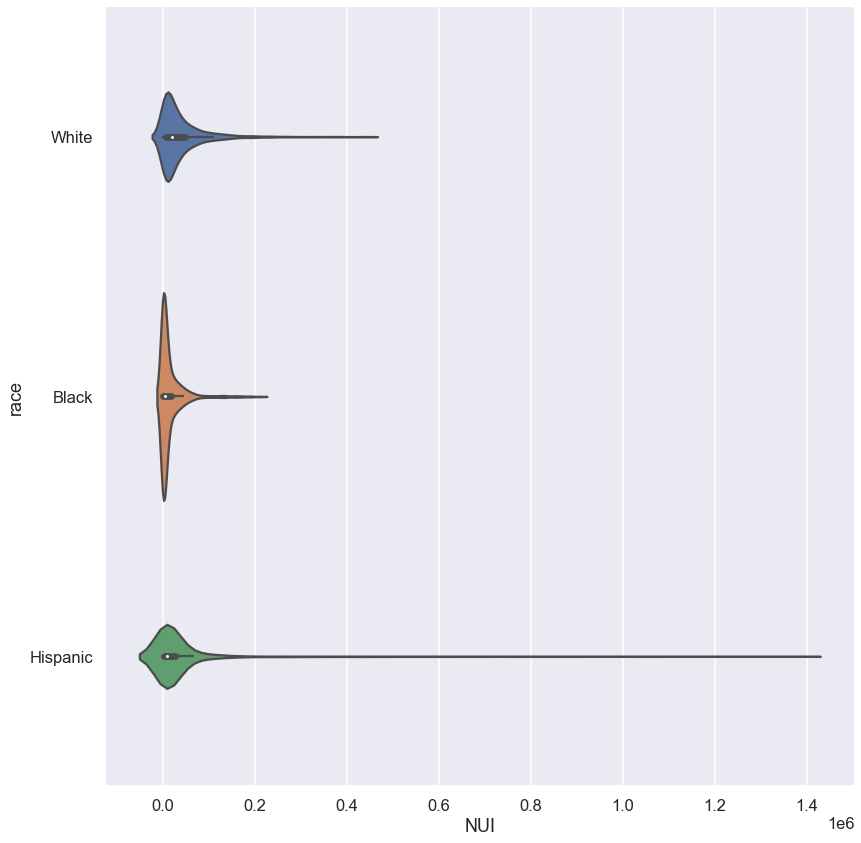

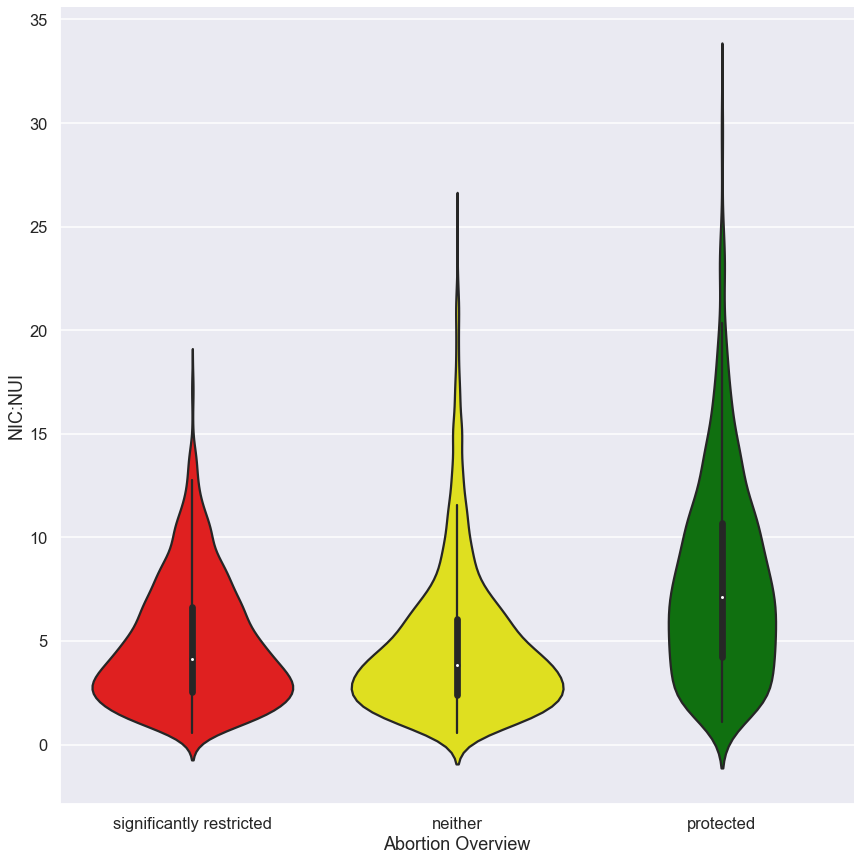

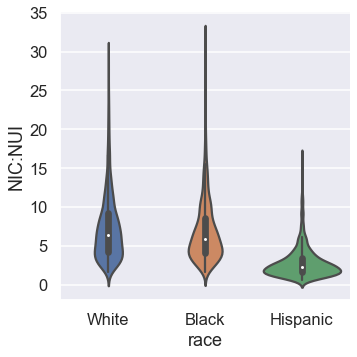

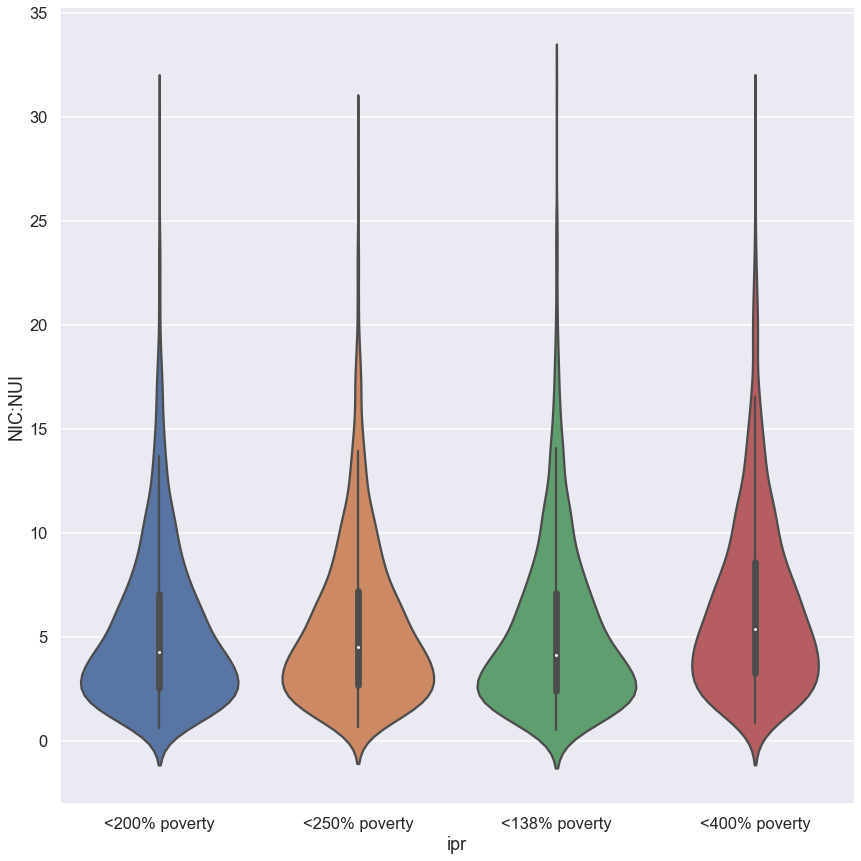

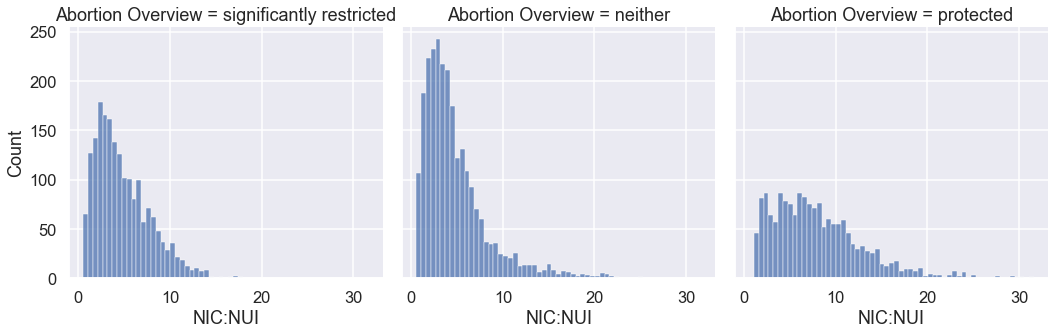

In [10]:
NUI_vs_racecat = sns.catplot(data=state_data, x="NUI", y="race", kind="violin", height=12)
ratio_vs_abortion = sns.catplot(data=state_data, x="Abortion Overview", y = "NIC:NUI", kind="violin",
                                palette=['red','yellow','green'], height=12)
ratio_vs_race = sns.catplot(data=state_data, x="race", y = "NIC:NUI", kind="violin")
ratio_vs_income = sns.catplot(data=state_data, x="ipr", y = "NIC:NUI", height=12, kind="violin")
abortion_vs_ratio = sns.displot(data=state_data, x='NIC:NUI', col='Abortion Overview')

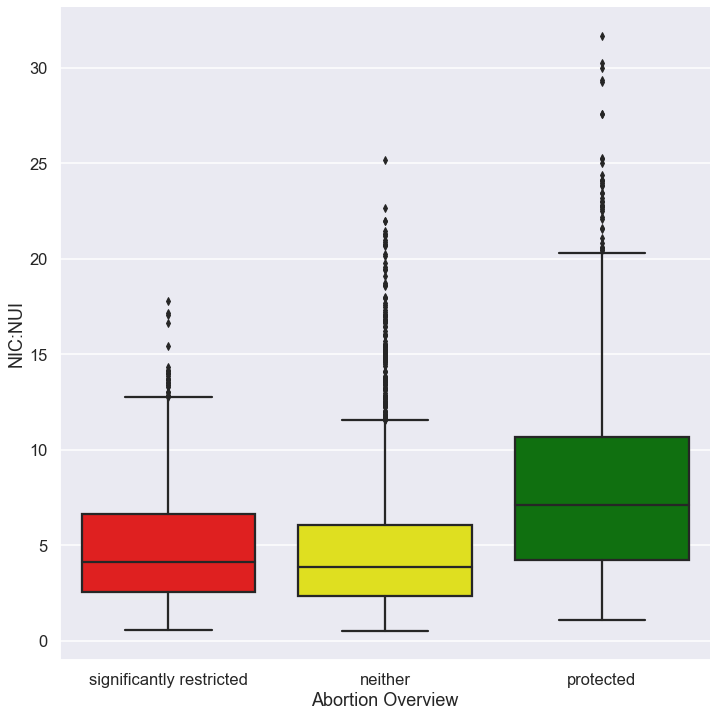

In [11]:
ratio_vs_abortion = sns.catplot(data=state_data, x='Abortion Overview', y='NIC:NUI', kind="box",
                               palette=['red','yellow','green'], height=10)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Classification Accuracy: 0.4792250233426704


/Users/parkerfaircloth-henise/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


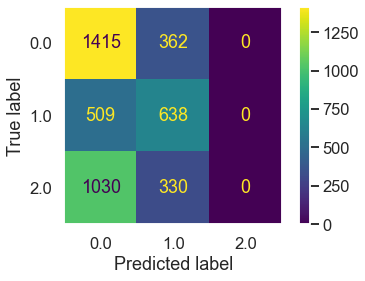

In [13]:
Y = OrdinalEncoder().fit_transform(state_data[["Abortion Overview"]].values)
X = state_data[['NIC:NUI',"iprcat","racecat", "Child Care Total Score", "Paid Leave Legislation Total Score","Infant Care %",'NUI',"NIPR","NIC"]].values
#we split the dataset into a test and training set
train_x, test_x, train_y, test_y = train_test_split(X,Y , test_size=0.7, random_state=0)
clf = LogisticRegression(solver='lbfgs',multi_class='multinomial')
clf.fit(train_x, train_y)
clf.score(test_x, test_y)
metrics.plot_confusion_matrix(clf, test_x, test_y)
plt.grid(False)
print("Classification Accuracy:", clf.score(test_x, test_y))

In [14]:
# Insurance Changes 2014-2018

In [15]:
sahie_2017 = pd.read_csv("data/sahie_2017.csv", header=68, dtype=str)
sahie_2017 = fix_sahie(sahie_2017)

sahie_2016 = pd.read_csv("data/sahie_2016.csv", header=68, dtype=str)
sahie_2016 = fix_sahie(sahie_2016)

sahie_2015 = pd.read_csv("data/sahie_2015.csv", header=68, dtype=str)
sahie_2015 = fix_sahie(sahie_2015)

sahie_2014 = pd.read_csv("data/sahie_2014.csv", header=68, dtype=str)
sahie_2014 = fix_sahie(sahie_2014)

In [16]:
sahie_1415 = pd.merge(sahie_2014[['state_name','index','NIC:NUI']],sahie_2015[['index','NIC:NUI']],on='index')
sahie_1415 = sahie_1415.rename(columns={"NIC:NUI_x":"NIC:NUI 2014", "NIC:NUI_y":"NIC:NUI 2015"})

sahie_1416 = pd.merge(sahie_1415,sahie_2016[['NIC:NUI','index']],on='index')
sahie_1416 = sahie_1416.rename(columns={"NIC:NUI":"NIC:NUI 2016"})

sahie_1417 = pd.merge(sahie_1416,sahie_2017[['NIC:NUI','index']],on='index')
sahie_1417 = sahie_1417.rename(columns={"NIC:NUI":"NIC:NUI 2017"})

sahie = pd.merge(sahie_1417,sahie_2018[['NIC:NUI','index']],on='index')
sahie = sahie.rename(columns={"NIC:NUI":"NIC:NUI 2018"})

sahie['overall NIC:NUI change'] = sahie['NIC:NUI 2018'] - sahie['NIC:NUI 2014']

In [17]:
sahie_abortion = pd.merge(sahie, abortion[['Abortion Overview', 'Infant Care %', 'Child Care Total Score', 
                                           'Paid Leave Legislation Total Score', 'State']], 
                                            left_on=['state_name'], right_on='State')
sahie_abortion = sahie_abortion.drop(columns=['state_name'])

In [18]:
sahie_abortion_cutdown = sahie_abortion[['State', 'Abortion Overview', 'Infant Care %',
                                        'Child Care Total Score', 'Paid Leave Legislation Total Score']].copy()
sahie_abortion_cutdown = sahie_abortion_cutdown.drop_duplicates()
sahie_abortion_cutdown = sahie_abortion_cutdown.reset_index()
sahie_abortion_cutdown['Average NIC:NUI Change'] = 0.0
prev_state='Alabama'
vals = []
k=0
for i in range(len(sahie_abortion['State'])):
    this_state=sahie_abortion['State'][i]
    if this_state == prev_state:
        vals.append(sahie_abortion['overall NIC:NUI change'][i])
    else:
        avg = sum(vals) / len(vals)
        sahie_abortion_cutdown['Average NIC:NUI Change'][k] = avg
        vals = []
        k=k+1
        prev_state=this_state
        vals.append(sahie_abortion['overall NIC:NUI change'][i])
    if i == len(sahie_abortion['State']) - 1:
        avg = sum(vals) / len(vals)
        sahie_abortion_cutdown['Average NIC:NUI Change'][k] = avg

sahie_abortion_cutdown = sahie_abortion_cutdown.sort_values(by='Average NIC:NUI Change', ascending=False)

<ipython-input-18-8294c8876978>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sahie_abortion_cutdown['Average NIC:NUI Change'][k] = avg
<ipython-input-18-8294c8876978>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sahie_abortion_cutdown['Average NIC:NUI Change'][k] = avg


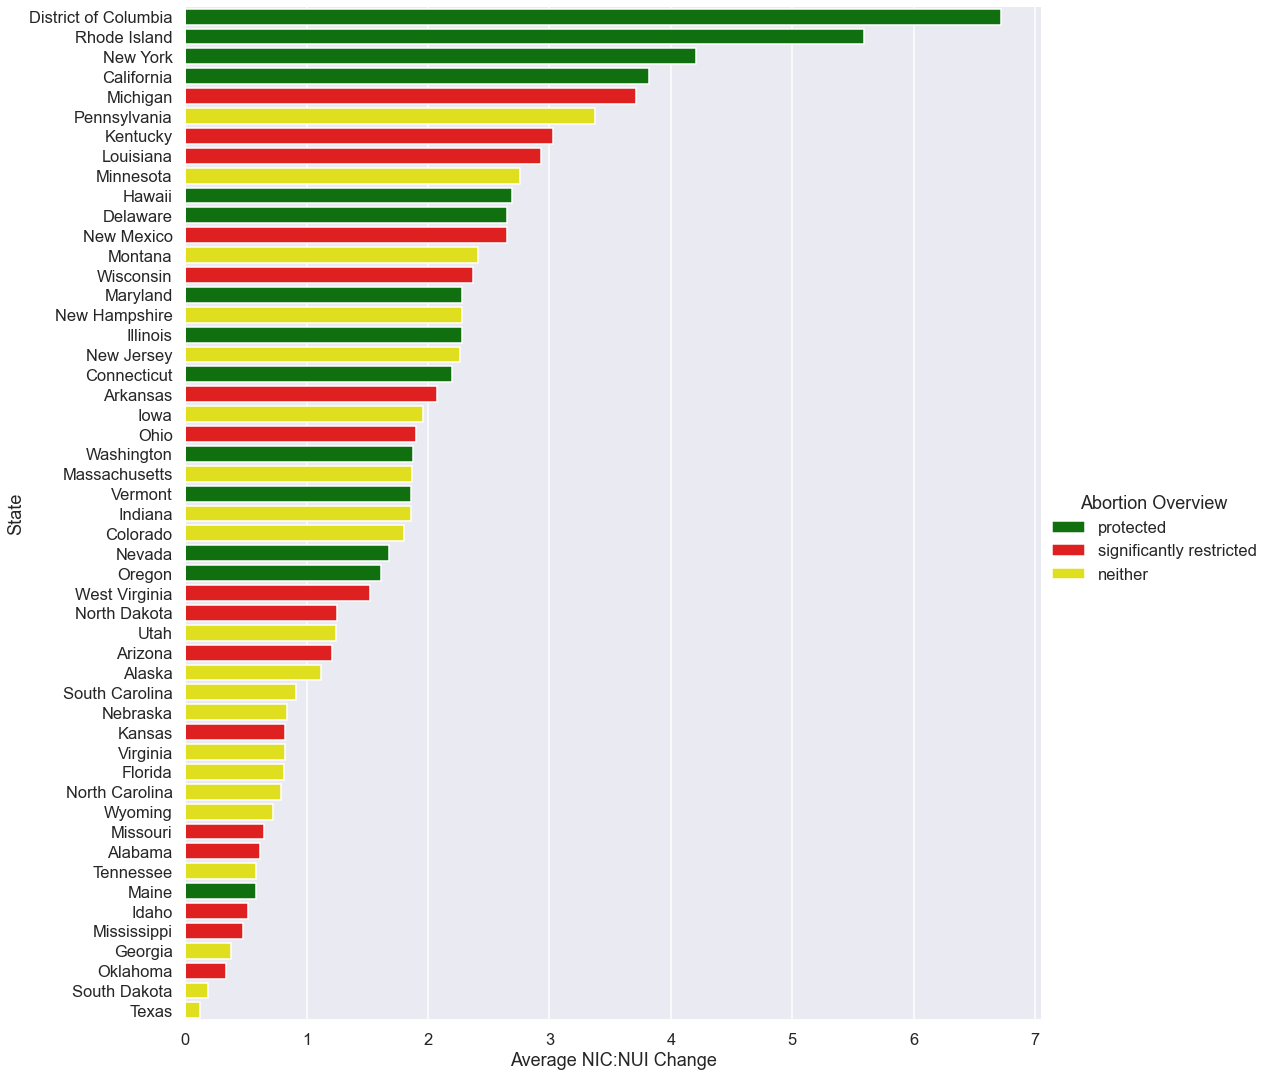

In [19]:
state_vs_change = sns.catplot(data=sahie_abortion_cutdown, y='State', x='Average NIC:NUI Change', kind='bar', 
                              hue='Abortion Overview', height=15, dodge=False, palette=["green", "red", "yellow"])

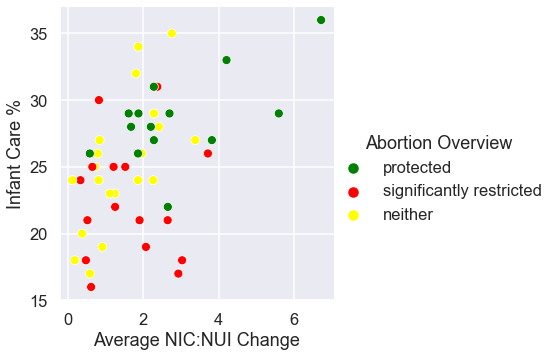

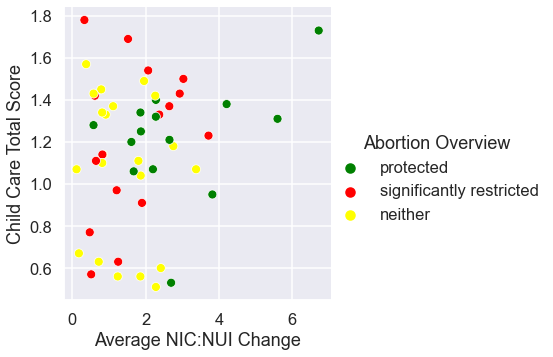

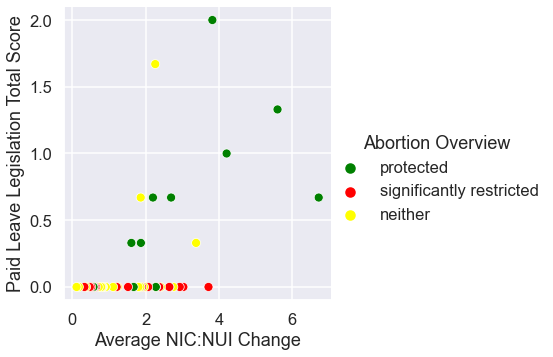

In [20]:
careperc_vs_change = sns.relplot(data=sahie_abortion_cutdown, x='Average NIC:NUI Change', y='Infant Care %', hue='Abortion Overview', palette=["green", "red", "yellow"])
childcare_vs_change = sns.relplot(data=sahie_abortion_cutdown, x='Average NIC:NUI Change', y='Child Care Total Score', hue='Abortion Overview', palette=["green", "red", "yellow"])

paidleave_vs_change = sns.relplot(data=sahie_abortion_cutdown, x='Average NIC:NUI Change', y='Paid Leave Legislation Total Score', hue='Abortion Overview', palette=["green", "red", "yellow"])



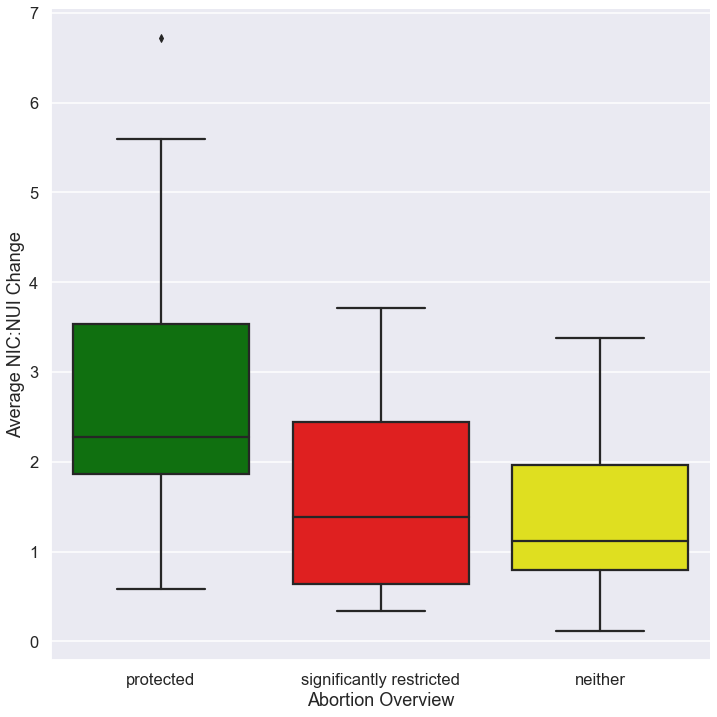

In [21]:
change_vs_abortion = sns.catplot(data=sahie_abortion_cutdown, x='Abortion Overview', y='Average NIC:NUI Change',
                                 palette=['green','red','yellow'], kind="box", height=10)